In [7]:
import pandas as pd
import numpy as np

In [8]:
# read in the data
digit_zero = pd.read_csv("digitData0.csv", header=None)
digit_one = pd.read_csv("digitData1.csv", header=None)
digit_zero.shape
digit_zero.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [12]:
# merge the two dataframes and rename the header
# if axis=0, then it will be row-wise concatenation else column-wise concatenation when axis=1
Feature_set = pd.concat([digit_zero, digit_one], axis=0)
Feature_set.columns = ["feature_" + str(i + 1) for i in range(Feature_set.shape[1])]
Feature_set.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [13]:
cols=["feature_"+str(i+1) for i in range(Feature_set.shape[1]-1)]
cols.append("Target")
Feature_set.columns=cols

Feature_set.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [14]:
# use elbow method to find the optimal number of clusters for K-means clustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

In [15]:
# generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=2, centers=8, random_state=42)

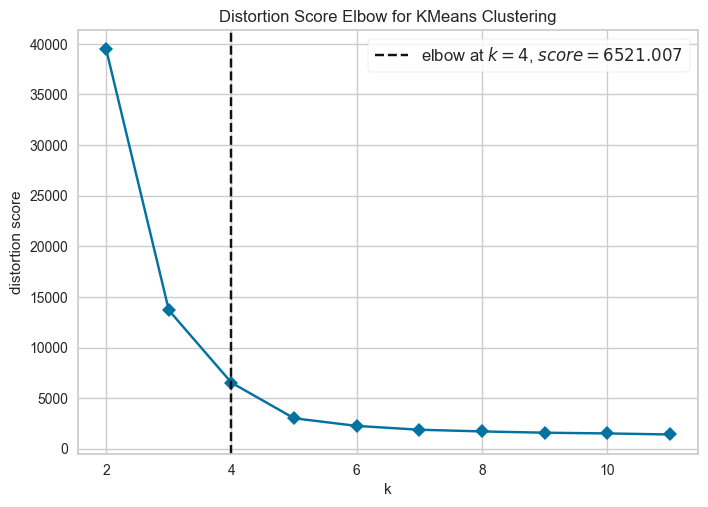

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='distortion', timings=False) # distortion is the same as Eucledian distance
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [28]:
# generate another synthetic dataset with 8 random clusters
X = Feature_set.iloc[:,0:-1] # all rows and all columns except the last one
y_true = Feature_set.iloc[:,-1] # all rows and only the last column
model = KMeans(n_clusters=2)
y_pred = model.fit_predict(X)

In [29]:
# performance metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, y_pred))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, y_pred))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, y_pred))

Silhouette Coefficient: 0.119
Calinski-Harabasz Index: 409.338
Davies-Bouldin Index: 2.538


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.31      0.99      0.47       320
         1.0       0.14      0.94      0.24       327
         2.0       0.00      0.00      0.00       318
         3.0       0.00      0.00      0.00       328
         4.0       0.00      0.00      0.00       323
         5.0       0.00      0.00      0.00       325
         6.0       0.00      0.00      0.00       323
         7.0       0.00      0.00      0.00       320
         8.0       0.00      0.00      0.00       313
         9.0       0.00      0.00      0.00       321

    accuracy                           0.19      3218
   macro avg       0.05      0.19      0.07      3218
weighted avg       0.05      0.19      0.07      3218



C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [31]:
from sklearn import metrics
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
print("Purity Score: %0.3f" % purity_score(y_true, y_pred))

Purity Score: 0.202


In [32]:
# DBSCAN
from sklearn.cluster import DBSCAN

X = Feature_set.iloc[:,0:-1] # all rows and all columns except the last one
y_true = Feature_set.iloc[:,-1] # all rows and only the last column
model = DBSCAN(eps=0.3, min_samples=10) # eps is the maximum distance between two samples for one to be considered as in the neighborhood of the other and min_samples is the number of samples in a neighborhood for a point to be considered as a core point (i.e. a cluster center)
y_pred = model.fit_predict(X) # fit the model and predict the cluster labels for each sample

print(purity_score(y_true, y_pred))


0.1019266625233064


In [33]:
# Hierarchical Clustering (Agglomerative Clustering) with complete linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

def plot_dendogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [34]:
X = Feature_set.iloc[:,0:-1] # all rows and all columns except the last one
y_true = Feature_set.iloc[:,-1] # all rows and only the last column
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="complete", affinity="cosine")
model = model.fit(X) # fit the model

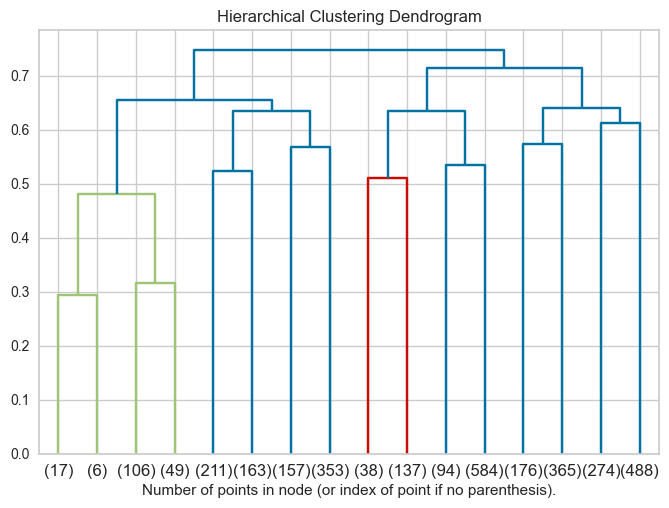

In [35]:
# plot the dendogram
plt.title('Hierarchical Clustering Dendrogram')
plot_dendogram(model, truncate_mode='level', p=3) # p is the number of levels in the truncated dendrogram to display
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [36]:
# performance metrics
model = AgglomerativeClustering(n_clusters=2, linkage="complete", affinity="cosine")
y_pred = model.fit_predict(X) # fit the model and predict the cluster labels for each sample
print(purity_score(y_true, y_pred))

0.1963952765692977
